In [156]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer


In [157]:
df_train = pd.read_csv("F:\\Text audio dataset\\test.txt",names=["Text","Emotion"],sep=';')

In [158]:
df_train.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [159]:
df_train.shape

(2000, 2)

In [160]:
df_train.Emotion.value_counts()

Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

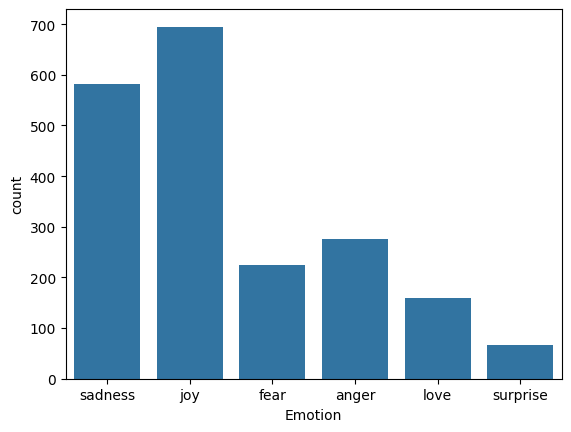

In [161]:
sns.countplot(x='Emotion',data=df_train)

In [162]:
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [163]:
df_train.isna().sum()

Text       0
Emotion    0
dtype: int64

In [164]:
df_train['Text'].duplicated().sum()

0

In [165]:
index = df_train[df_train['Text'].duplicated()==True].index

In [166]:
index

Index([], dtype='int64')

In [167]:
df_train.iloc[index]

,Text,Emotion


In [168]:
df_train.drop(index=index,inplace=True)
df_train['Text'].duplicated().sum()

0

In [169]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def lemmatization(text):
    lemmatizer= WordNetLemmatizer()
    text = text.split()
    text=[lemmatizer.lemmatize(y) for y in text]    
    return " " .join(text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    text = text.split()
    text=[y.lower() for y in text]    
    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [170]:
def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df


In [171]:
df_train= normalize_text(df_train)

In [172]:
df_train.head()

,Text,Emotion
0,im feeling rather rotten im ambitious right,sadness
1,im updating blog feel shitty,sadness
2,never make separate ever want feel like ashamed,sadness
3,left bouquet red yellow tulip arm feeling slig...,joy
4,feeling little vain one,sadness


In [173]:
df_train.to_csv('F:\\Text audio dataset\\cleaned_data_test.csv')